# Examen Módulo 2 - Montecarlo - 2.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf
%matplotlib inline

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [2]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b - a)

2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [77]:
def dy(x):
    return (np.log(2 + np.sin(2*x**2))/ (x * np.exp(-x**3)))

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [85]:
N1 = ["0.1 <= x <= 0.3", "0.3 <= x <= 0.5", "0.5 <= x <= 0.7", "0.7 <= x <= 0.9", "0.9 <= x <= 0.11"]

In [98]:
table1 =  pd.DataFrame(columns = ["Aproximación"], index = N1)

In [101]:
a = 0.1
b = 0.3
v = 0
for i in range(len(N1)):
    aprox = montecarlo(dy, N1[v], a, b)
    a = a + 0.2
    b = b + 0.2
    v = v + 1
    table1.loc[i, "Aproximación"] = aprox
    
table1

TypeError: 'str' object cannot be interpreted as an integer

4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [12]:
def bernoulli(x, y):
    return (np.exp(-0.05*(x**2 + y**2))*np.sin(x**2 + y**2)) > (0.5)

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

In [21]:
a1 = -3
b1 = 3
a2 = -3
b2 = 3

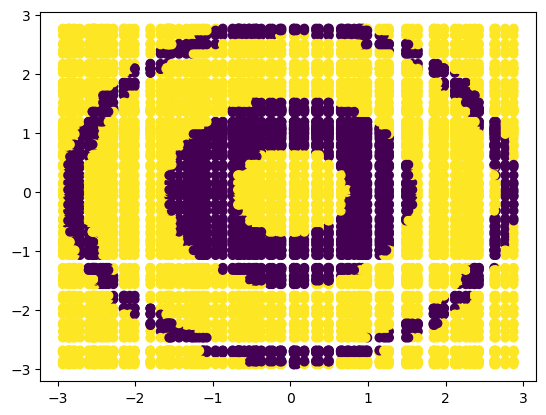

In [24]:
x = np.random.uniform(a1, b1 , 100)
y = np.random.uniform(a2, b2, 100)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=~ bernoulli(X, Y))

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [26]:
def montecarlo2(region, xmin, xmax, ymin, ymax, N):
    x = np.random.uniform(xmin, xmax, N)
    y = np.random.uniform(ymin, ymax, N)
    B = region(x, y)
    AR = (xmax-xmin)*(ymax-ymin)
    return np.mean(B)*AR

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [27]:
N = np.logspace(4, 6, 3)
AR = (b1 - a1) * (b2 - a2)

table5 =  pd.DataFrame(columns = ["Aproximación", "Error relativo"], index = N)
for i5 in N:
    aprox = montecarlo2(bernoulli, a1, b1, a2, b2, int(i5))
    Crel = np.sqrt((1 - aprox / AR) / (aprox / AR))
    Error_rel = np.log(Crel) - ((1/2) * np.log(i5))
    table5.loc[i5, "Aproximación"] = aprox
    table5.loc[i5, "Error relativo"] = Error_rel
    
table5

,Aproximación,Error relativo
10000.0,10.674,-4.17316
100000.0,10.87992,-5.338088
1000000.0,10.899072,-6.490642


---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [28]:
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [31]:
i = np.arange(4)

In [41]:
x = np.array([0, 0, 0])
x_historial = [0]
y_historial = [0]
z_historial = [0]

N = 1000000

A_lista = [A0, A1, A2, A3]
b_lista = [b0, b1, b2, b3]

for k in range(N):
    i_actual = random.choice(i)
    
    A = A_lista[i_actual]
    b = b_lista[i_actual]
    
    x = A@x + b
    
    x_historial.append(x[0])
    y_historial.append(x[1])
    z_historial.append(x[2])

C:\Users\kevin\AppData\Local\Temp\ipykernel_18784\3765790465.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


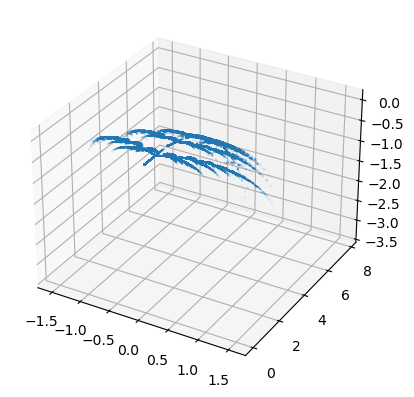

In [44]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x_historial, y_historial, z_historial, s = 0.01)

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Tesla** o **Google**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 31 de octubre del 2021.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [46]:
def getClose(names, start, end):
    return yf.download(names, start = start, end = end)["Adj Close"]

2. Obtenga los precios de cierre ajustados para Tesla y Google desde el 31 de octubre de 2019 al 31 de octubre de 2021.

In [49]:
data_tsla = getClose("TSLA", "2019-10-31", "2021-10-31")
data_googl = getClose("GOOGL", "2019-10-31", "2021-10-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


3. Calcule el rendimiento **simple** para ambas empresas.

### TESLA

In [51]:
R_tsla = (data_tsla - data_tsla.shift()) / data_tsla.shift()
R_tsla

Date
2019-10-31         NaN
2019-11-01   -0.005112
2019-11-04    0.013278
2019-11-05   -0.000787
2019-11-06    0.029506
                ...   
2021-10-25    0.126616
2021-10-26   -0.006274
2021-10-27    0.019078
2021-10-28    0.037751
2021-10-29    0.034316
Name: Adj Close, Length: 504, dtype: float64

### GOOGLE

In [52]:
R_googl = (data_googl - data_googl.shift()) / data_googl.shift()
R_googl

Date
2019-10-31         NaN
2019-11-01    0.010685
2019-11-04    0.013645
2019-11-05    0.001419
2019-11-06   -0.000333
                ...   
2021-10-25   -0.000869
2021-10-26    0.013543
2021-10-27    0.049595
2021-10-28   -0.002520
2021-10-29    0.015064
Name: Adj Close, Length: 504, dtype: float64

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [61]:
def sim_r(media, std, inicio, fin, N):
    fechas = pd.date_range(inicio, fin)
    r =  np.random.normal(media, std, size = (len(fechas), N))
    return pd.DataFrame(index = fechas, data = r)

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de octubre de 2021 al 5 de febrero de 2022.

### TESLA

In [63]:
R_tsla.describe()

count    503.000000
mean       0.006769
std        0.045735
min       -0.210628
25%       -0.016357
50%        0.003825
75%        0.027287
max        0.198949
Name: Adj Close, dtype: float64

In [62]:
R_tsla_mean = R_tsla.mean()
R_tsla_std = R_tsla.std()
r_simulados_tsla = sim_r(R_tsla_mean, R_tsla_std, "2021-10-31", "2022-02-05", 100000)

### GOOGLE

In [64]:
R_googl.describe()

count    503.000000
mean       0.001902
std        0.020024
min       -0.116341
25%       -0.006087
50%        0.002780
75%        0.011097
max        0.092412
Name: Adj Close, dtype: float64

In [65]:
R_googl_mean = R_googl.mean()
R_googl_std = R_googl.std()
r_simulados_googl = sim_r(R_googl_mean, R_googl_std, "2021-10-31", "2022-02-05", 100000)

6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

### TESLA

In [66]:
precios_simulados_tsla = (r_simulados_tsla + 1).cumprod()*data_tsla[-1]

### GOOGLE

In [67]:
precios_simulados_googl = (r_simulados_googl + 1).cumprod()*data_googl[-1]

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

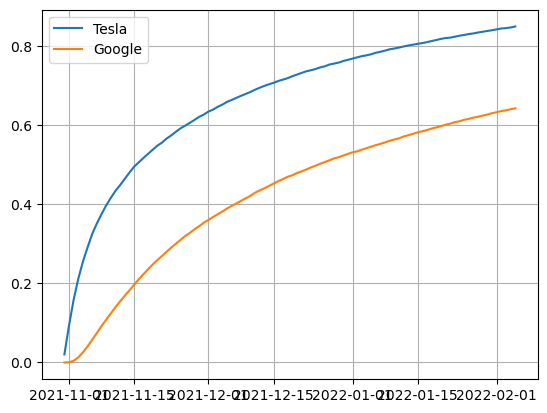

In [75]:
valor_deseado_tsla = data_tsla[-1] * 1.10
probabilidad_tsla = (precios_simulados_tsla >= valor_deseado_tsla).mean(axis = 1)

valor_deseado_googl = data_googl[-1] * 1.10
probabilidad_googl = (precios_simulados_googl >= valor_deseado_googl).mean(axis = 1)

plt.figure()
plt.plot(probabilidad_tsla, label = "Tesla")
plt.plot(probabilidad_googl, label = "Google")
plt.grid()
plt.legend(loc="best")

La accion que ofrece mejores exoectativas de obtener el 10% de retorno es TESLA

#### Extra <font size='1'>(10 puntos)</font>

Compara tus resultados con los valores verdaderos.

In [93]:
data_tsla_reales = getClose("TSLA", "2021-10-31", "2022-02-05")
data_googl_reales = getClose("GOOGL", "2021-10-31", "2022-02-05")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


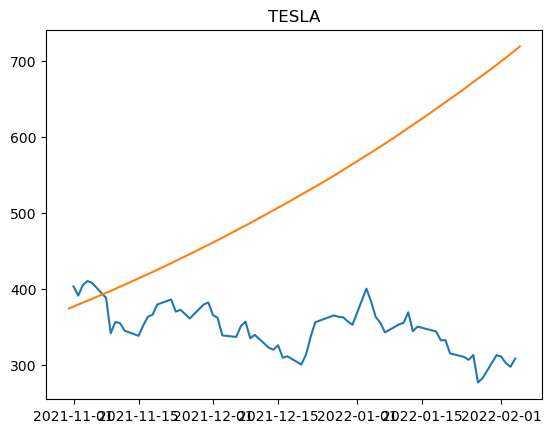

In [96]:
plt.figure()
plt.title("TESLA")
plt.plot(data_tsla_reales)
plt.plot((precios_simulados_tsla).mean(axis = 1))

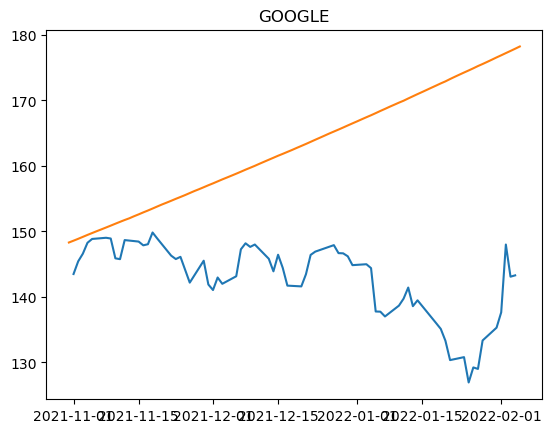

In [97]:
plt.figure()
plt.title("GOOGLE")
plt.plot(data_googl_reales)
plt.plot((precios_simulados_googl).mean(axis = 1))